In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataframe= pd.read_csv('Social_Network_Ads.csv')

In [3]:
dataframe['Gender']=(dataframe['Gender']=='Male').astype(int)
dataframe

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19.0,19000.0,0
1,15810944,1,35.0,20000.0,0
2,15668575,0,26.0,43000.0,0
3,15603246,0,27.0,57000.0,0
4,15804002,1,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,0,46.0,41000.0,1
396,15706071,1,51.0,23000.0,1
397,15654296,0,50.0,20000.0,1
398,15755018,1,36.0,33000.0,0


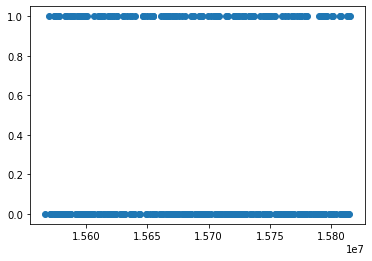

In [4]:
plt.scatter(dataframe['User ID'],dataframe['Purchased'])

In [5]:
X=dataframe.iloc[:,2:-1]
X

,Age,EstimatedSalary
0,19.0,19000.0
1,35.0,20000.0
2,26.0,43000.0
3,27.0,57000.0
4,19.0,76000.0
...,...,...
395,46.0,41000.0
396,51.0,23000.0
397,50.0,20000.0
398,36.0,33000.0


In [6]:
y=dataframe['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [7]:
from sklearn.preprocessing import StandardScaler as sc

In [8]:
scaler=sc()

In [9]:
X_sc=scaler.fit_transform(X)

In [10]:
X_sc

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
neighbors=5
model=KNeighborsClassifier(n_neighbors=neighbors)

In [13]:
from sklearn.model_selection import train_test_split as split

In [14]:
X_train,X_test,y_train,y_test=split(X_sc,y,test_size=0.2)

In [15]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [16]:
model.predict(X_test)

array([0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [17]:
model.score(X_train,y_train)

0.925

In [18]:
model.score(X_test,y_test)

0.9125

In [19]:
nbrs=range(3,50)
nbrs

range(3, 50)

In [20]:
scoretrain=[]
scoretest=[]
for i in nbrs:
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    scoretest.append(model.score(X_test,y_test))
    scoretrain.append(model.score(X_train,y_train))

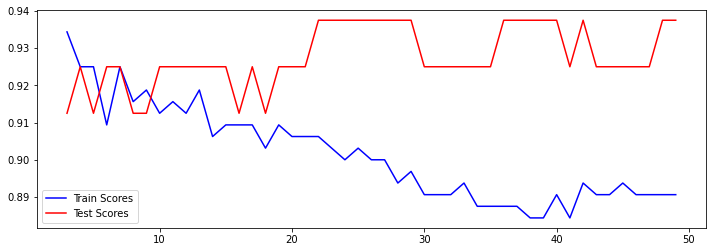

In [21]:
plt.figure(figsize=(12,4))
plt.plot(nbrs,scoretrain,label='Train Scores',color='blue')
plt.plot(nbrs,scoretest,label='Test Scores',color='red')
plt.legend()

In [22]:
scoretest.index(max(scoretest))

19

In [26]:
scoretest[19]

0.9375

In [27]:
scoretrain[19]

0.90625

In [28]:
finalModel=KNeighborsClassifier(n_neighbors=19)

In [29]:
finalModel.fit(X_sc,y)

KNeighborsClassifier(n_neighbors=19)

In [30]:
finalModel.score(X_sc,y)

0.9125

In [31]:
y_pred=finalModel.predict(X_test)

In [32]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [33]:
cm

array([[44,  6],
       [ 0, 30]], dtype=int64)

In [34]:
pd.DataFrame(cm,columns=['satinalmadi','satinaldi'],index=['satinalmaz','satinalir'])

,satinalmadi,satinaldi
satinalmaz,44,6
satinalir,0,30


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


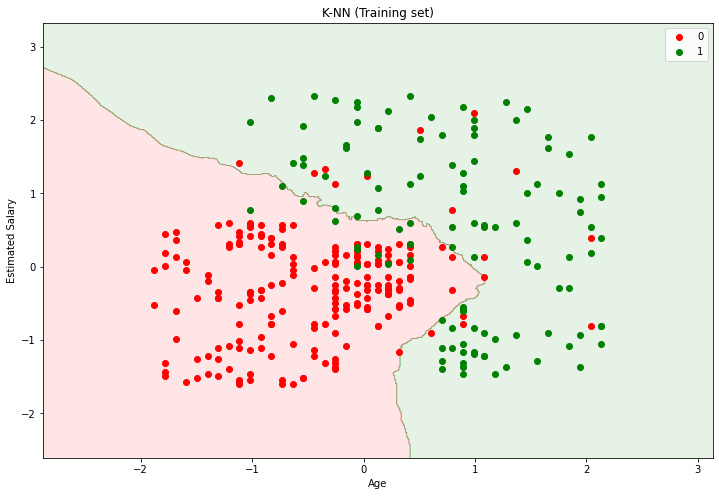

In [35]:
# Visualising the Training set results
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
# plt.contourf(X1, X2, finalModel.predict_proba(
#     np.array([X1.ravel(), X2.ravel()]).T)[:,-1]
#     .reshape(X1.shape),
#              alpha = 0.75, cmap='jet',vmin=0,vmax=1)
# plt.colorbar()
plt.contourf(X1, X2, finalModel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.1, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


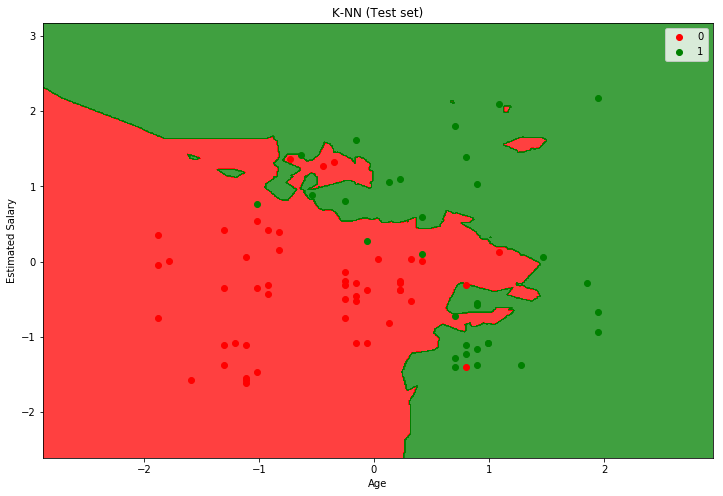

In [63]:
# Visualising the Test set results
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, finalModel.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
degree=4

In [39]:
X_poli=PolynomialFeatures(degree=degree,include_bias=False).fit_transform(X_train)

In [40]:
logicModel=LogisticRegression(C=0.1)

In [41]:
logicModel.fit(X_poli,y_train)

LogisticRegression(C=0.1)

In [42]:
logicModel.score(PolynomialFeatures(degree=degree,include_bias=False).fit_transform(X_test),y_test)

0.9

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


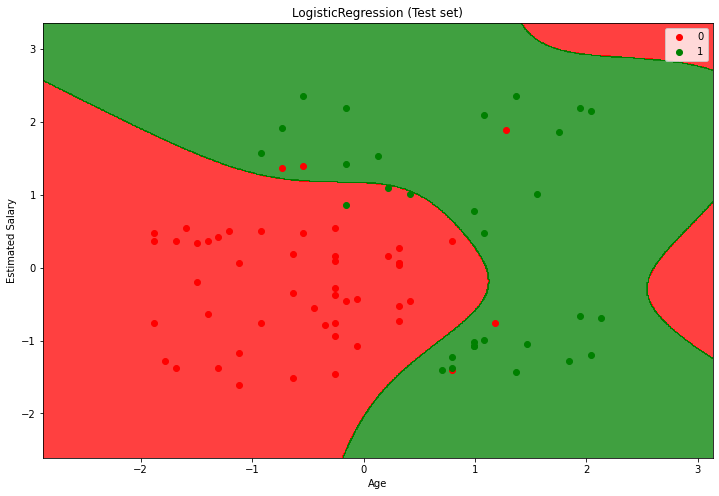

In [43]:
# Visualising the Test set results
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logicModel.predict(
    PolynomialFeatures(degree=degree,include_bias=False).fit_transform(np.array([X1.ravel(), X2.ravel()]).T)
).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('LogisticRegression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


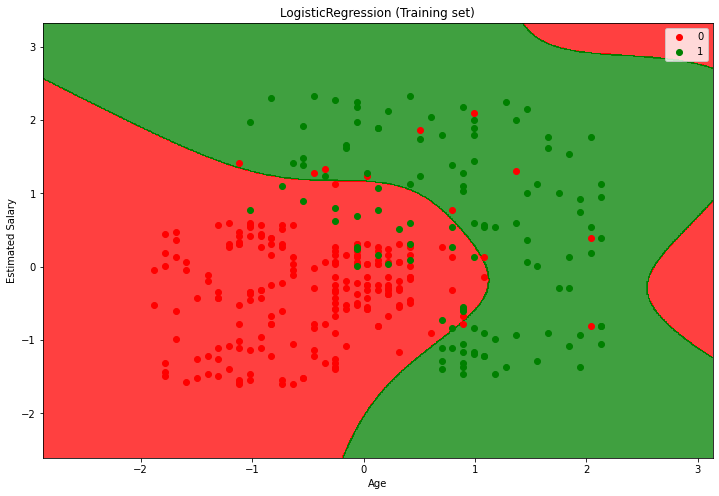

In [44]:
# Visualising the Training set results
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logicModel.predict(
    PolynomialFeatures(degree=degree,include_bias=False).fit_transform(np.array([X1.ravel(), X2.ravel()]).T))
    .reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('LogisticRegression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


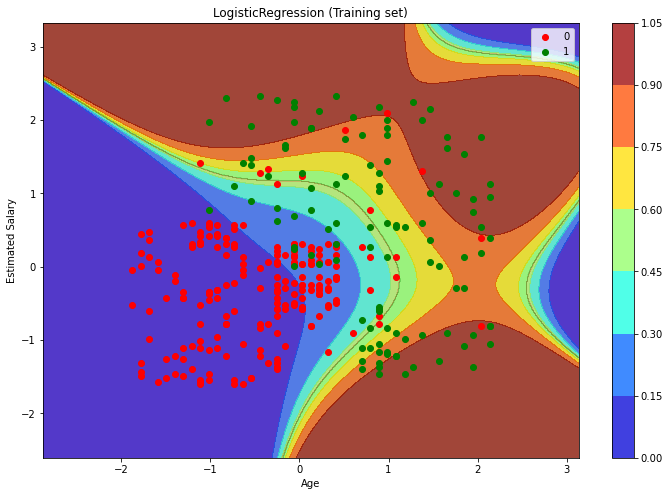

In [45]:
# Visualising the Training set results
plt.figure(figsize=(12,8))
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, logicModel.predict_proba(
    PolynomialFeatures(degree=degree,include_bias=False).fit_transform(np.array([X1.ravel(), X2.ravel()]).T))[:,-1]
    .reshape(X1.shape),
             alpha = 0.75, cmap='jet',vmin=0,vmax=1)
plt.colorbar()
plt.contourf(X1, X2, logicModel.predict(
    PolynomialFeatures(degree=degree,include_bias=False).fit_transform(np.array([X1.ravel(), X2.ravel()]).T))
    .reshape(X1.shape),
             alpha = 0.1, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('LogisticRegression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()

In [46]:
from sklearn.datasets import make_blobs

In [74]:
XX,yy = make_blobs(n_samples=3000, centers=2, cluster_std=2)

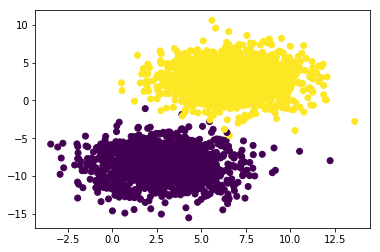

In [75]:
plt.scatter(XX.T[0], XX.T[1], c=yy)

In [76]:
nbrs = range(1,50)

In [79]:
train = []
test = []
X_train, X_test, y_train, y_test = split(XX, yy, test_size=0.2)
for nbr in nbrs:
    modelK = KNeighborsClassifier(n_neighbors=nbr)
    modelK.fit(X_train, y_train)
    train.append(log_loss(y_test, model.predict_proba(X_test)[:,-1]))
    test.append(log_loss(y_train, model.predict_proba(X_train)[:,-1]))

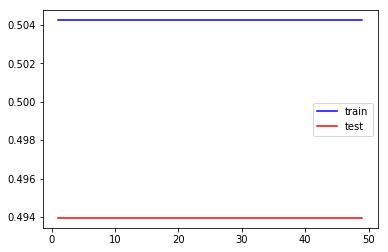

In [80]:
plt.plot(nbrs, train, label='train', color='blue')
plt.plot(nbrs, test, label='test', color='red')
plt.legend()

In [78]:
from sklearn.metrics import log_loss

In [265]:

log_loss(y_test, model.predict_proba(X_test)[:,-1])

1.1932681839634263